**Bank Churn Prediction**
Objective:

Given a Bank Customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 month.

Context

Business like banks which provide services have to worry about problem of "Churn" ie. Customers leaving and Joining another service provideer. It is important to understand which aspect of the service influenncea customer's decision in this regards. Management can concentrate efforts on improvement of service. keeping in mind these priorities.

#1. Read the Dataset

In [ ]:
# Importing relevant dictionaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [ ]:
#code to read csv file into colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'18uJawlT3FXU4f7zSHWMpmJTwBxdB06BZ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Churn_modelling.csv') 

In [ ]:
#Read File

#3.1 Read file as panda dataframe
import pandas as pd
df = pd.read_csv('Churn_modelling.csv') 

In [ ]:
df.head(3) # read the header 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.tail(3) # read the tail

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 14)

Observation:

1. This dataset is composed of 10,000 rows representing a customer and 14 features, although some of the features would have to be droped.

2. There are 14 variables 9'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited')

3. RowNumber, CustomerID and Surname are unique variable and are not necessary to the prediction, hence should be droped.

4. "Exited" is target or Label variabel while the rest are the Predictors.

# 2. Drop the Columns which are unique for all the users like IDs

In [ ]:
df=df.drop({"RowNumber","CustomerId","Surname"},axis=1)

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


**Univerated and Biverated Analysis**

In [ ]:
# check the size of dataset

totalrow=df.shape[0]
totalcol=df.shape[1]
print("The number of rows in the dataset:",totalrow)

print("The number of columns in the dataset:",totalcol)

The number of rows in the dataset: 10000
The number of columns in the dataset: 11


In [ ]:
#let convert the "object" variables to categorical

for feature in df.columns: #iterate through the dataset
    if df[feature].dtype == "object":
        df[feature]=pd.Categorical(df[feature])
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [ ]:
# check for null values

df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check for the uniqueness counts of the function attributes

df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
#list the unique values in the categorical variable

for i in list(df.columns[df.dtypes=="category"]):
    print(df[i].value_counts())
    print()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64



In [ ]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]


Number of duplicate rows = 0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
#Observation: No Duplicates

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
# Checking for dispersion, inter quantile range
IQR = df.quantile(0.75) - df.quantile(0.25)
display("IQR:",IQR)

'IQR:'

CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [ ]:
# Range
display("Range :",df.max()-df.min())

'Range :'

CreditScore           500.00
Age                    74.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           3.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    199980.90
Exited                  1.00
dtype: float64

In [ ]:
# Variance
display("Variance",df.var().round(2))

'Variance'

CreditScore        9.341860e+03
Age                1.099900e+02
Tenure             8.360000e+00
Balance            3.893436e+09
NumOfProducts      3.400000e-01
HasCrCard          2.100000e-01
IsActiveMember     2.500000e-01
EstimatedSalary    3.307457e+09
Exited             1.600000e-01
dtype: float64

In [ ]:
# Coveriance

display("Coveriance",df.cov())

'Coveriance'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,9341.860157,-4.019150,0.235355,3.780408e+04,0.687999,-0.240492,1.239139,-7.694701e+03,-1.054722
Age,-4.019150,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205250
Tenure,0.235355,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.016309
Balance,37804.076998,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2978.931708
NumOfProducts,0.687999,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011203
HasCrCard,-0.240492,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001310
IsActiveMember,1.239139,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031429
EstimatedSalary,-7694.701048,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,280.204670
Exited,-1.054722,1.205250,-0.016309,2.978932e+03,-0.011203,-0.001310,-0.031429,2.802047e+02,0.162223


In [ ]:
#Check Kurtosis
display("Kurtosis",df.kurtosis().round(2))

'Kurtosis'

CreditScore       -0.43
Age                1.40
Tenure            -1.17
Balance           -1.49
NumOfProducts      0.58
HasCrCard         -1.19
IsActiveMember    -2.00
EstimatedSalary   -1.18
Exited             0.17
dtype: float64

In [ ]:
#Check skewness
display("Skewness",df.skew().round(2))

'Skewness'

CreditScore       -0.07
Age                1.01
Tenure             0.01
Balance           -0.14
NumOfProducts      0.75
HasCrCard         -0.90
IsActiveMember    -0.06
EstimatedSalary    0.00
Exited             1.47
dtype: float64

**Data Visualization**

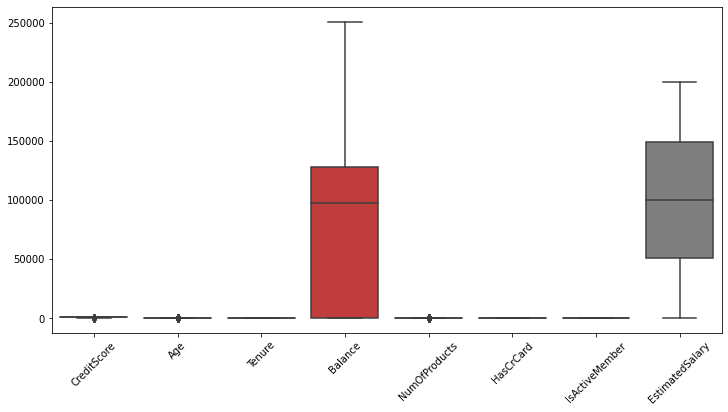

In [ ]:
# Investigate the outliers of the dependent variables
import seaborn as sns
dep=df.drop("Exited", axis=1)
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=dep)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
#Observation: No feasible Outliers

In [ ]:
# Let check on gender distribution
display("Gender Categorical variable Count and Percentage:",df["Gender"].value_counts().sort_index(),
      (df["Gender"].value_counts().sort_index()*100/df["Gender"].count().round(2)))

'Gender Categorical variable Count and Percentage:'

Female    4543
Male      5457
Name: Gender, dtype: int64

Female    45.43
Male      54.57
Name: Gender, dtype: float64

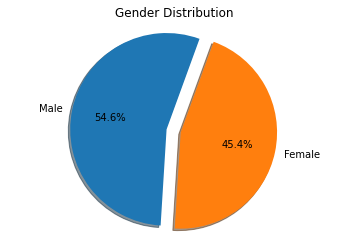

In [ ]:
source_counts =pd.DataFrame(df["Gender"].value_counts()).reset_index()
source_counts.columns =["Labels","Gender"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Gender"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70),
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Distribution")
plt.show()

In [ ]:
#Observation: There are more male customers at 54.6% than Female at 45.4%

In [ ]:
# Let check for the Customers geographical distribution
display("Geography Categorical variable Count and Percentage:",df["Geography"].value_counts().sort_index(),
      (df["Geography"].value_counts().sort_index()*100/df["Geography"].count().round(2)))

'Geography Categorical variable Count and Percentage:'

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


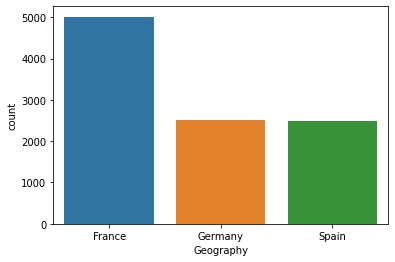

In [ ]:
sns.countplot(df["Geography"])

In [ ]:
#Observation: France is the highest at 50..14%, then German at 25.09% and last is Spain at 24.77%

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# Let check for the Customers distribution based on the Nos of Products they have with the bank.
display("NumOfProducts variable Count and Percentage:",df["NumOfProducts"].value_counts().sort_index(),
      (df["NumOfProducts"].value_counts().sort_index()*100/df["NumOfProducts"].count().round(2)))

'NumOfProducts variable Count and Percentage:'

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


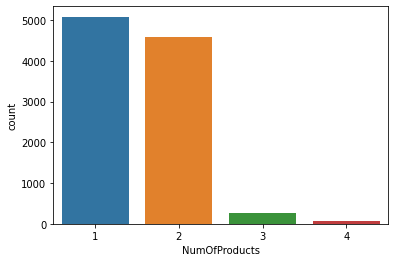

In [ ]:
sns.countplot(df["NumOfProducts"])

In [ ]:
# Observation: Production 1 has 50.84% subscription, Product 2: 45.90 Subscription, Production 3: at 2.66% subscription while Product 4 at 0.60% subscription.
# although it would have been nice to note what this products are

In [ ]:
# Let check for the Customers distribution based on if they have credit cards or not with the bank.
display("HasCrCard variable Count and Percentage:",df["HasCrCard"].value_counts().sort_index(),
      (df["HasCrCard"].value_counts().sort_index()*100/df["HasCrCard"].count().round(2)))

'HasCrCard variable Count and Percentage:'

0    2945
1    7055
Name: HasCrCard, dtype: int64

0    29.45
1    70.55
Name: HasCrCard, dtype: float64

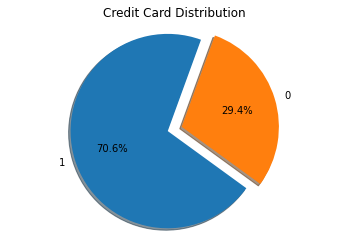

In [ ]:
source_counts =pd.DataFrame(df["HasCrCard"].value_counts()).reset_index()
source_counts.columns =["Labels","HasCrCard"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["HasCrCard"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70),
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Credit Card Distribution")
plt.show()

In [ ]:
#Observation: 70.6% of the bank customer have creidt card while 29.4% do not have credit card.

In [ ]:
# Let check for the Customers distribution based on if they are Active member or not with the bank.
display("IsActiveMember variable Count and Percentage:",df["IsActiveMember"].value_counts().sort_index(),
      (df["IsActiveMember"].value_counts().sort_index()*100/df["IsActiveMember"].count().round(2)))

'IsActiveMember variable Count and Percentage:'

0    4849
1    5151
Name: IsActiveMember, dtype: int64

0    48.49
1    51.51
Name: IsActiveMember, dtype: float64

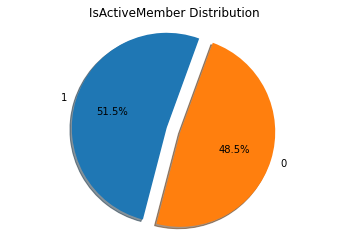

In [ ]:
source_counts =pd.DataFrame(df["IsActiveMember"].value_counts()).reset_index()
source_counts.columns =["Labels","IsActiveMember"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["IsActiveMember"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70),
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IsActiveMember Distribution")
plt.show()

In [ ]:
# Observation: 51.5% of the customers are active while 48.5% are not

In [ ]:
# Let check for the Customers that have Exited
display("Exited variable Count and Percentage:",df["Exited"].value_counts().sort_index(),
      (df["Exited"].value_counts().sort_index()*100/df["Exited"].count().round(2)))

'Exited variable Count and Percentage:'

0    7963
1    2037
Name: Exited, dtype: int64

0    79.63
1    20.37
Name: Exited, dtype: float64

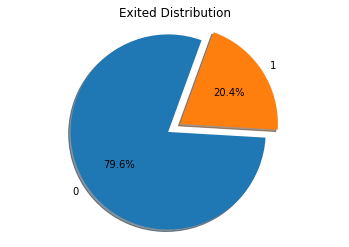

In [ ]:
source_counts =pd.DataFrame(df["Exited"].value_counts()).reset_index()
source_counts.columns =["Labels","Exited"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Exited"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70),
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Exited Distribution")
plt.show()

In [ ]:
# ObservationL 79.6% of the bank customer has Exited the bank over the period and this a serious source of concern hence the reason for this modelling 
#  to determine what can be done to correct this
# 20.4% of the customers are still with the bank, we eqaully need to know what has been keeping them

In [ ]:
df.describe().T.loc[["Age",]].round(2)

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.92,10.49,18.0,32.0,37.0,44.0,92.0


Observation

1. Nos of Observation = 1000
2. Mean age is 39
3. Minimum age of customer is 18
4. Maximum age is 92
5. Std: 10.49
6. median = 37yrs
7. The plot is slighlty positively skewed.

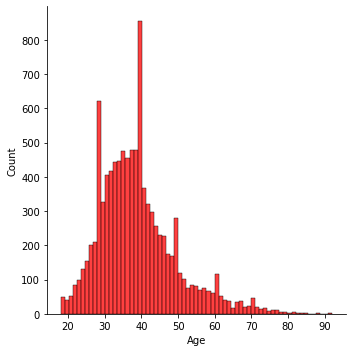

In [ ]:
sns.displot(df.Age, color = "red")

In [ ]:
df.describe().T.loc[["CreditScore",]].round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.0,584.0,652.0,718.0,850.0


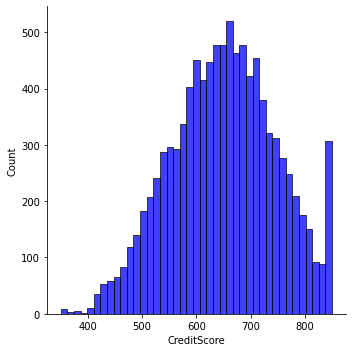

In [ ]:
sns.displot(df.CreditScore, color = "blue")

Observation

1. No of observation =1000
2. mean score = 650.83
3. Std: 96.65
4. Minmum Credit score= 350
5. Average Credit score: 650
6. Maximum Credit Score: 718
7. The distribution is almost normal

In [ ]:
df.describe().T.loc[["EstimatedSalary",]].round(2)

,count,mean,std,min,25%,50%,75%,max
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


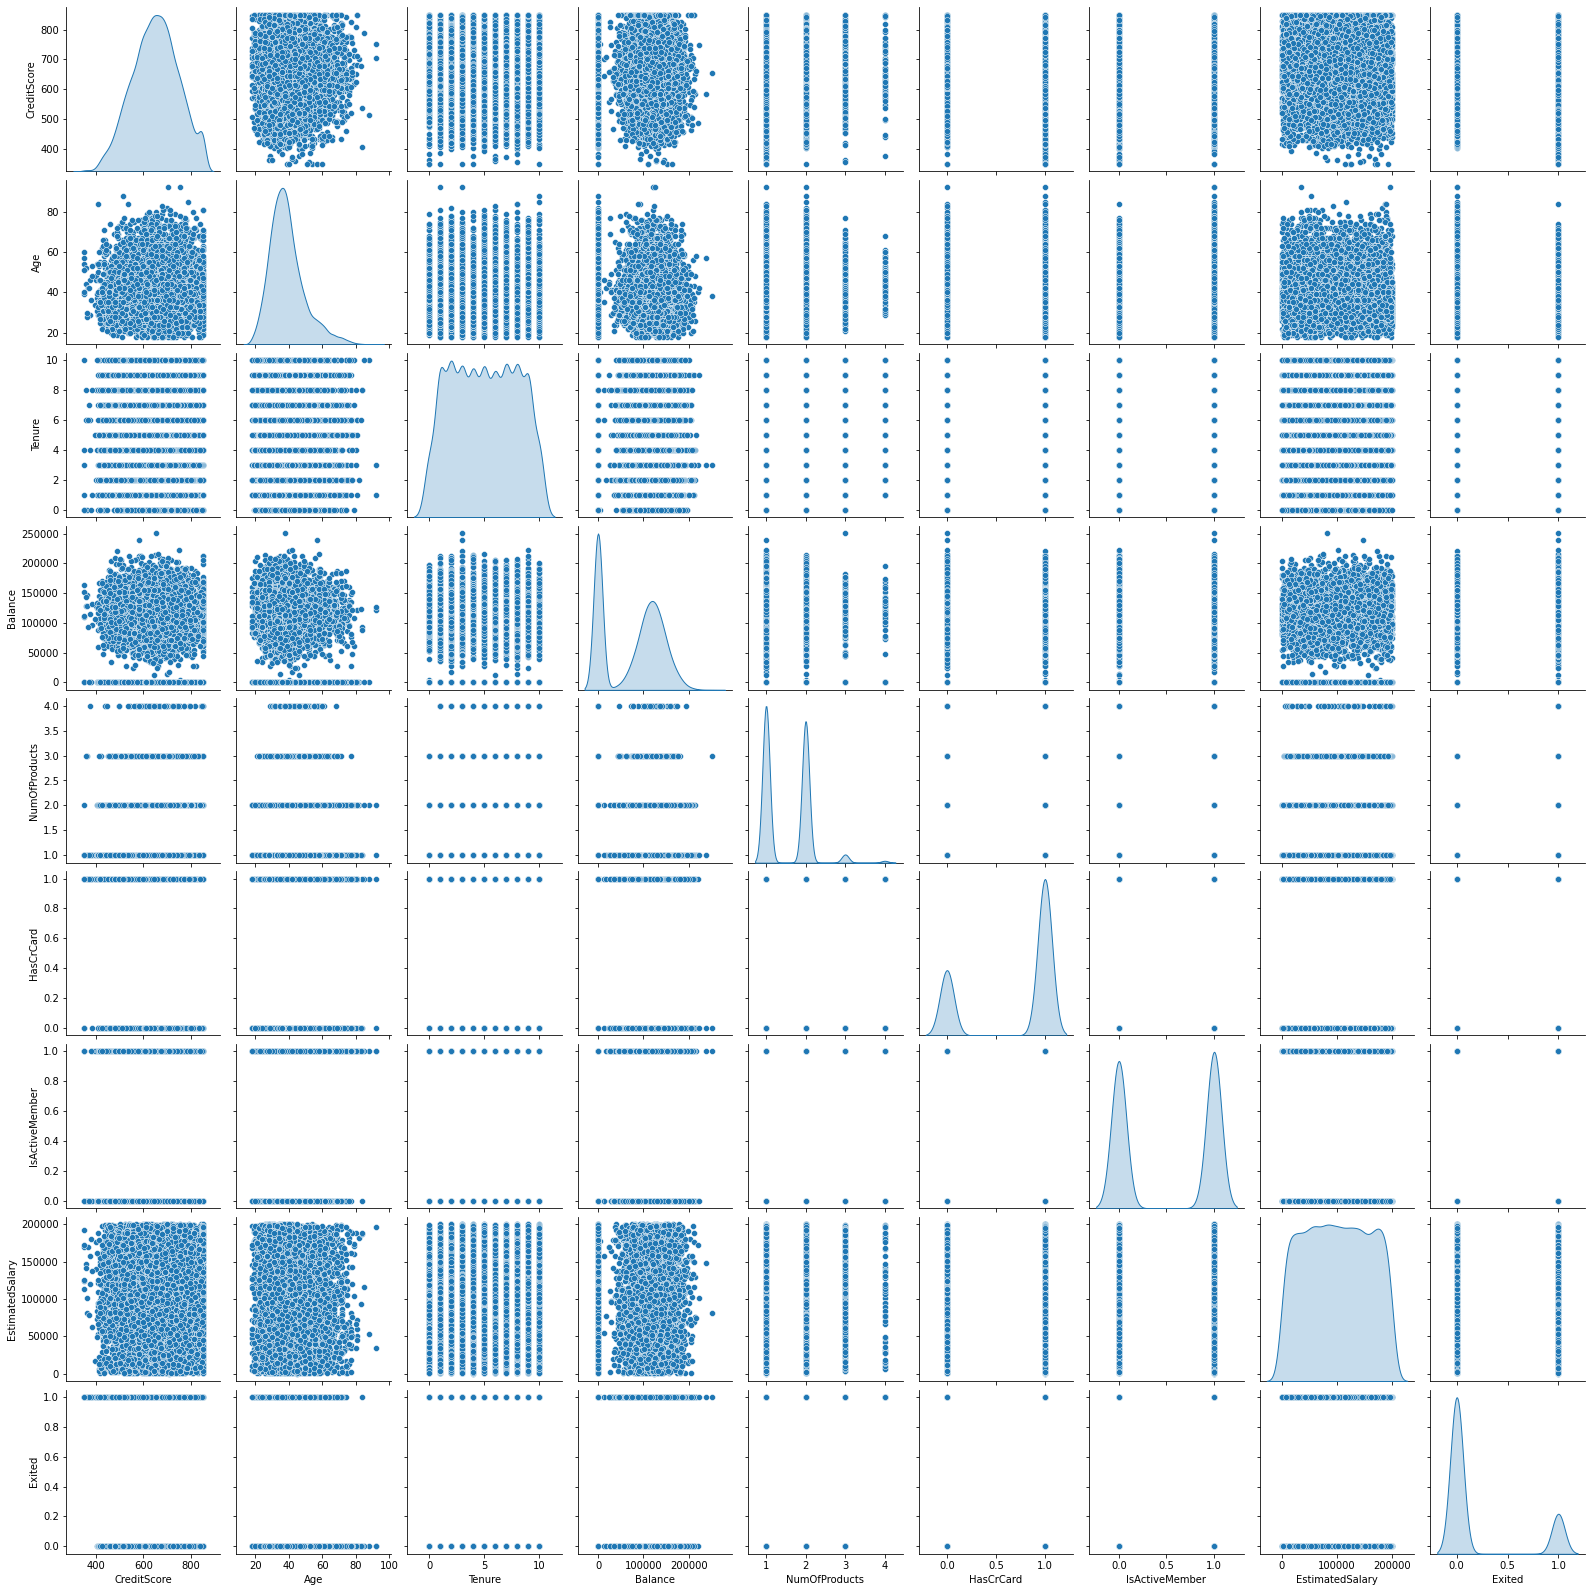

In [ ]:
# pair plot of the Correlation
sns.pairplot(df, diag_kind= "kde")
plt.show()

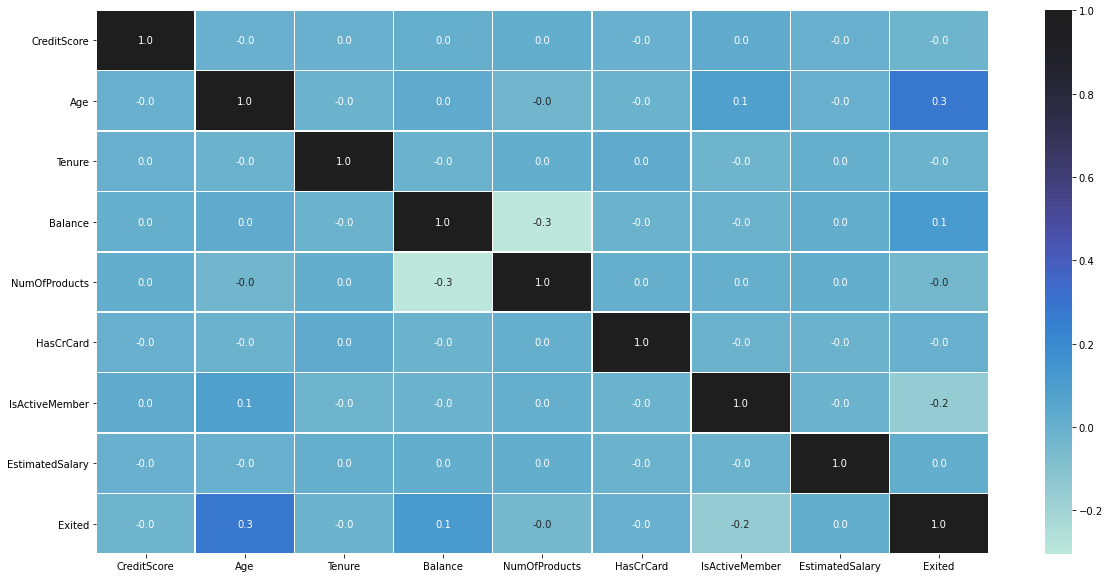

In [ ]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap

In [ ]:
# Observation: No visible correlations

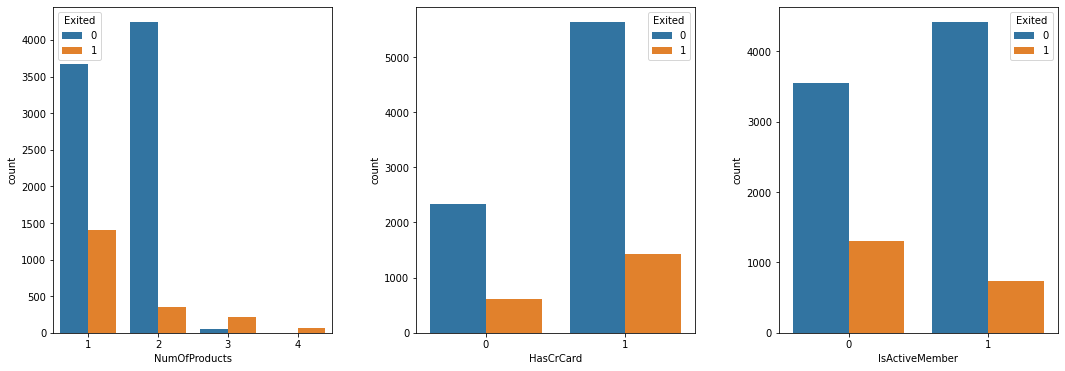

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

In [ ]:
#Observation:
#Customer with 3 or 4  products are higher chances to Exit or chun

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; y

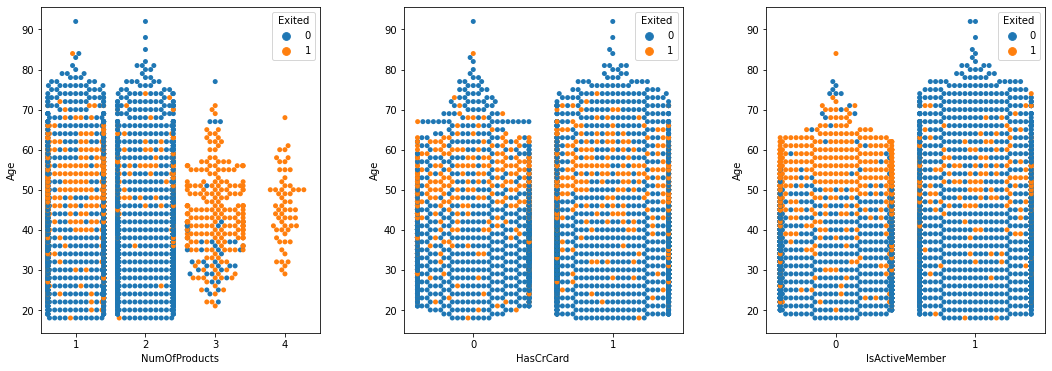

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = df, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = df, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = df, ax = ax[2])

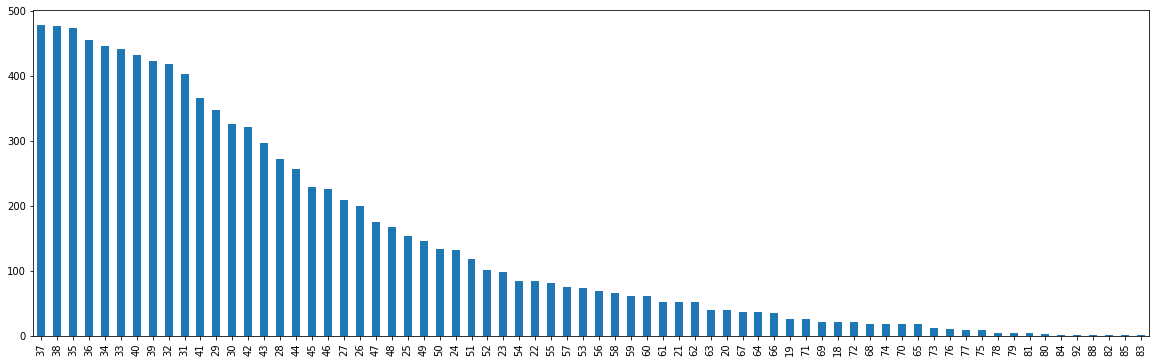

In [ ]:
df["Age"].value_counts().plot.bar(figsize=(20,6))

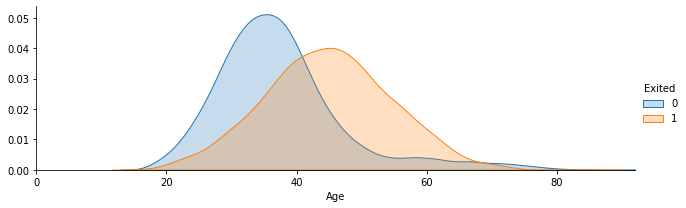

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

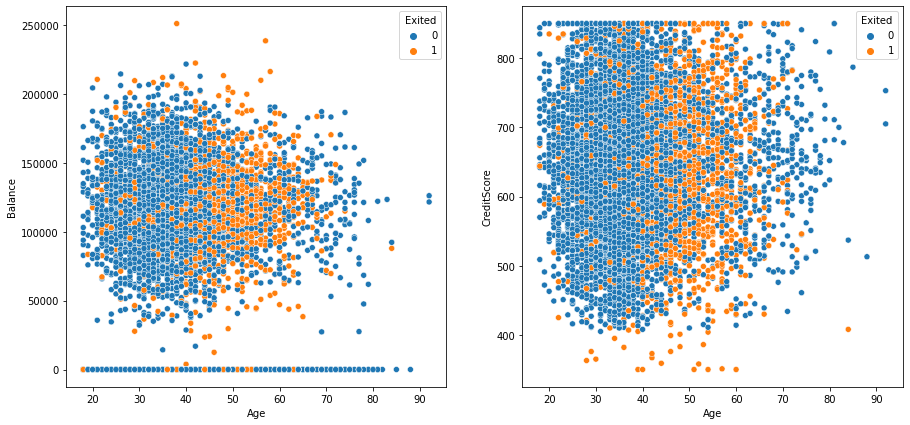

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

In [ ]:
#Observation:
# 1. 40 to 70 years old customers are higher chances to churn
# 2. Customer with CreditScore less then 400 are higher chances to churn

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


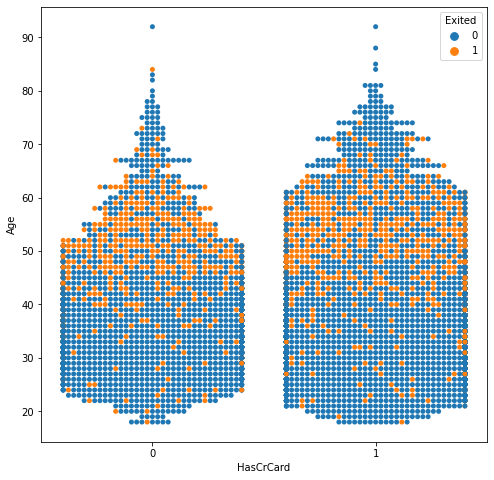

In [ ]:

plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = df, hue="Exited")

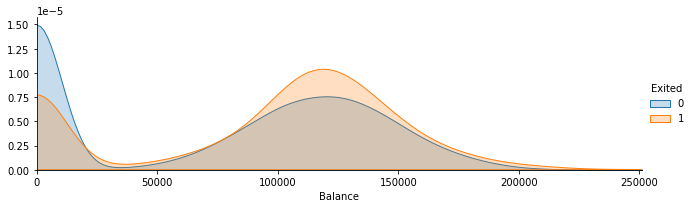

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()

plt.show()

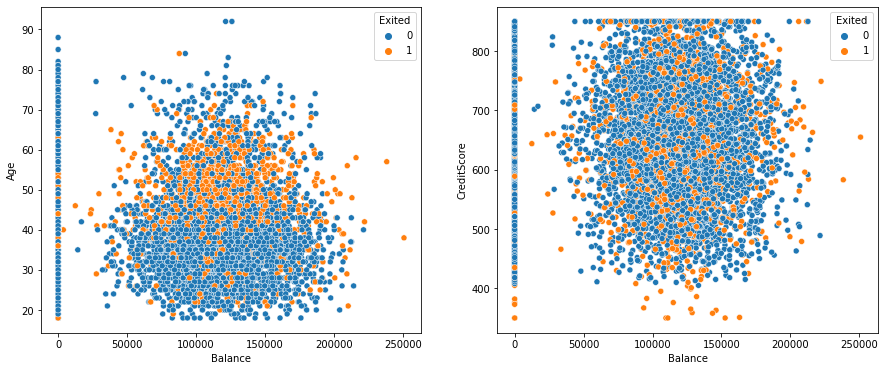

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])

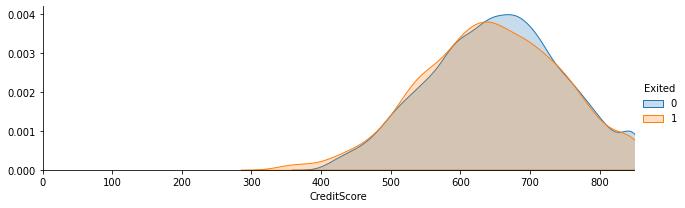

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()

plt.show()

# 3. Distinguish the features and target variable

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=dfcopy

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# one-hot encoding to convert the categorical variable to binary
geography=pd.get_dummies(df["Geography"],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender=pd.get_dummies(df["Gender"],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
# Combine the dataset with the main dataset
df=pd.concat([df,geography,gender],axis = 1)

In [ ]:
# let's drop Geography and Gender as they have been converted already.
df=df.drop(["Geography","Gender"],axis=1)

In [ ]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [ ]:
print("Shape",df.shape)
print("no of rows",df.shape[0])
print("no of columns",df.shape[1])

Shape (10000, 12)
no of rows 10000
no of columns 12


In [ ]:
#Convert the datatype to float64
df = df.astype(float)

In [ ]:
#distinguish the features and target variables
# The Features or Predictor variables
x_df=df.drop("Exited",axis=1)
x_df.head(3) # feature variables 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0


In [ ]:
y_df =df["Exited"] # Target Variable

In [ ]:
y_df

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64

# 4. Divide the data into training and test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 7)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
4989,629.0,40.0,9.0,0.00,1.0,1.0,0.0,106.67,0.0,0.0,1.0
4498,570.0,30.0,2.0,131406.56,1.0,1.0,1.0,47952.45,0.0,0.0,1.0
8876,556.0,46.0,3.0,131764.96,1.0,1.0,1.0,108500.66,0.0,1.0,1.0
670,624.0,48.0,3.0,122388.38,2.0,0.0,0.0,30020.09,1.0,0.0,0.0
9552,664.0,41.0,5.0,0.00,1.0,1.0,1.0,152054.33,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
919,552.0,45.0,9.0,0.00,2.0,1.0,0.0,26752.56,0.0,1.0,1.0
4307,770.0,46.0,9.0,190678.02,1.0,1.0,1.0,14725.36,0.0,1.0,1.0
5699,684.0,35.0,6.0,135871.50,1.0,1.0,1.0,87219.41,0.0,0.0,1.0
537,686.0,34.0,9.0,0.00,2.0,1.0,0.0,127569.80,0.0,1.0,1.0



# 5. Normalize the train and test data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. Initialize & build the model. Identify the points of improvement and implement the same

In [ ]:
# Initialize the model
model = Sequential()

In [ ]:
# Adding the input layer and  a hidden layer (activation function : relu)
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#adding a second hidden laayer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#adding output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#fitting the model
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 924us/step - loss: 0.4868 - accuracy: 0.7965
Epoch 2/100
800/800 [==============================] - 1s 869us/step - loss: 0.4280 - accuracy: 0.7968
Epoch 3/100
800/800 [==============================] - 1s 874us/step - loss: 0.4230 - accuracy: 0.7968
Epoch 4/100
800/800 [==============================] - 1s 854us/step - loss: 0.4182 - accuracy: 0.8188
Epoch 5/100
800/800 [==============================] - 1s 859us/step - loss: 0.4150 - accuracy: 0.8282
Epoch 6/100
800/800 [==============================] - 1s 845us/step - loss: 0.4130 - accuracy: 0.8321
Epoch 7/100
800/800 [==============================] - 1s 834us/step - loss: 0.4112 - accuracy: 0.8326
Epoch 8/100
800/800 [==============================] - 1s 850us/step - loss: 0.4095 - accuracy: 0.8335
Epoch 9/100
800/800 [==============================] - 1s 864us/step - loss: 0.4087 - accuracy: 0.8341
Epoch 10/100
800/800 [==============================] - 1s 834us/step - l

In [ ]:
#Model Evaluation

result=model.evaluate(X_test,y_test.values)

63/63 [==============================] - 0s 791us/step - loss: 0.3993 - accuracy: 0.8345


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred[:10]

array([[0.04547742],
       [0.07654282],
       [0.06712556],
       [0.38104567],
       [0.16980353],
       [0.05996069],
       [0.06913775],
       [0.01852831],
       [0.05269477],
       [0.2379868 ]], dtype=float32)

# 7. Predict the result using 0.5 as a threshold

In [ ]:
y_pred = (y_pred > 0.5)
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

**Observation**

The Prediction above is used to tell us if it is True or False depending on if the probability of the customer leaving was above or blow 50% threshold.

Note: It is Trye if the customer left the firm and False if the customer chose to stay.

# 8. Print the accuracy score and confusion matrix

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1549,   40],
       [ 291,  120]])

In [189]:
TP = 120 # True Positive
TN = 1549 # True Negative
FP = 291  # False Positive
FN  = 40 # False Negative

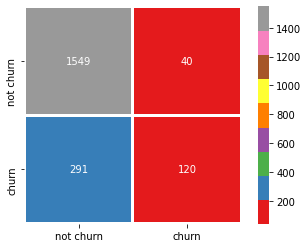

In [213]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt = "d",square = True,
 xticklabels=['not churn','churn'],
 yticklabels=['not churn','churn'],
 linewidths = 2,linecolor = 'w',cmap = 'Set1')
plt.subplots_adjust(wspace = .3,hspace = .3)

#Observation:

1. True Negative (TN): The model predicted 1549 customers won't churn (leave the bank in 6 month) and this was correct
2. False Positive (FP): The model Predicted that 291 customer would churn, but this was wrong.
3. False Negative (FN): The model predicted 40 won't leave or churn but this was wrong.
4. True Positive(TP): The model predicted that 120 customer would churn and this was correct.

In [181]:
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
Accuracy

0.8345

In [182]:
#Precision
Precision = TP / (TP + FP)
Precision

0.291970802919708

In [184]:
#Recall
Recall = TP / (TP + FN)
Recall

0.75

In [185]:
 #F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
F1_Score

0.42031523642732044

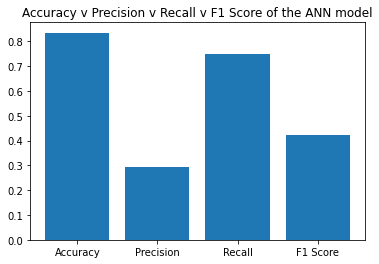

In [188]:
Eval_Metrics = [Accuracy, Precision, Recall, F1_Score]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall v F1 Score of the ANN model')
plt.show()

In [197]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.8345

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1589
         1.0       0.75      0.29      0.42       411

    accuracy                           0.83      2000
   macro avg       0.80      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



#Observation:

1. Accuracy is approximately 83%, Hence our model is indeed excellent, but Yes, there is always a scope of improvement

# Evaluating the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 3)

In [206]:

mean = accuracies.mean()
variance = accuracies.std()


#Improving the ANN(Dropout)

In [207]:
# improving the model with dropout
from keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dropout(rate = 0.1))

model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate = 0.1))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 888us/step - loss: 0.4916 - accuracy: 0.7966
Epoch 2/100
800/800 [==============================] - 1s 887us/step - loss: 0.4375 - accuracy: 0.7968
Epoch 3/100
800/800 [==============================] - 1s 882us/step - loss: 0.4285 - accuracy: 0.7968
Epoch 4/100
800/800 [==============================] - 1s 872us/step - loss: 0.4284 - accuracy: 0.7968
Epoch 5/100
800/800 [==============================] - 1s 904us/step - loss: 0.4253 - accuracy: 0.7991
Epoch 6/100
800/800 [==============================] - 1s 900us/step - loss: 0.4250 - accuracy: 0.8241
Epoch 7/100
800/800 [==============================] - 1s 902us/step - loss: 0.4269 - accuracy: 0.8270
Epoch 8/100
800/800 [==============================] - 1s 868us/step - loss: 0.4256 - accuracy: 0.8276
Epoch 9/100
800/800 [==============================] - 1s 891us/step - loss: 0.4248 - accuracy: 0.8303
Epoch 10/100
800/800 [==============================] - 1s 903us/step - l

In [208]:
#Model Evaluation

result=model.evaluate(X_test,y_test.values)

63/63 [==============================] - 0s 950us/step - loss: 0.4098 - accuracy: 0.8325


# Improving the ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

In [ ]:
parameters = {
    'batch_size': [25, 32],
    'epochs': [100, 500],
    'optimizer': ['adam', 'rmsprop']
}

In [ ]:

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 407/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8381
Epoch 408/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8385
Epoch 409/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8381
Epoch 410/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8389
Epoch 411/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8381
Epoch 412/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8381
Epoch 413/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8390
Epoch 414/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8378
Epoch 415/500
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8383
Epoch 416/500
288/288 

In [176]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [177]:

best_parameters

{'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}

In [178]:
best_accuracy

0.8425

## Observation:

1. After improving our model with Grid_Search 
2. Our best parameter is {'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}
3. Our model best accuracy = 84%